In [4]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0   1014      0 --:--:-- --:--:-- --:--:--  1014
Done installing Magnitude.


Install the Magnitude library and the pretrained model

In [5]:
from pymagnitude import Magnitude 
vectors = Magnitude('http://magnitude.plasticity.ai/word2vec/GoogleNews-vectors-negative300.magnitude')


Description of key functions and procedures

Getting some basic dimensions

In [42]:
len(vectors)


3000000

How to view the actual vector for a specific word (can be done for multiple words at once

In [18]:
vectors.query(['turtle'])

array([[ 0.01637  ,  0.072989 , -0.066381 ,  0.0633773, -0.0256813,
        -0.0699854, -0.0210256, -0.0164451,  0.031989 ,  0.0140421,
         0.0367949, -0.0961172, -0.0162949, -0.1387693, -0.0955165,
        -0.0447546, -0.0459561, -0.0408498, -0.1381685, -0.0007181,
         0.0405495, -0.019674 ,  0.0361941,  0.0949158, -0.0447546,
        -0.0651795, -0.0294359,  0.0762931,  0.1399707, -0.0100623,
        -0.0252308,  0.054066 , -0.045055 , -0.0086731,  0.0262821,
        -0.0567692,  0.0684835, -0.0162949,  0.0070211,  0.0444542,
        -0.0238791,  0.0456557,  0.0726887,  0.0804982, -0.0211758,
        -0.1081319, -0.0025343,  0.0859048,  0.1886301,  0.0582711,
        -0.0195238,  0.0657802,  0.0768938, -0.0318388,  0.0138169,
         0.0367949,  0.0333407,  0.0204249,  0.1519854,  0.0043553,
        -0.009837 , -0.0294359, -0.0049185, -0.0396484,  0.0309377,
        -0.0657802,  0.0008307, -0.0414506, -0.0130659, -0.0040362,
         0.0387473,  0.0252308, -0.0049185, -0.0

How to find the distance between two vectors

In [23]:
vectors.distance('cake', 'cookie')


0.991197

How to find the similarity between two vectors

In [22]:
vectors.similarity('cake','cookie')

0.5087643

In order to solve analogies, the most similar function can be used by specifying a word in the negative argument. Otherwise it will just generate the most similar words.

In [35]:
vectors.most_similar(positive = ["berlin", "spain"], negative = ["germany"])

[('luis', 0.5204659),
 ('fernando', 0.50381136),
 ('carlos', 0.49627244),
 ('diego', 0.49627244),
 ('ojos', 0.4823826),
 ('madrid', 0.48142323),
 ('cuesta', 0.48133546),
 ('puerta', 0.47725302),
 ('cosas', 0.4767569),
 ('dubai', 0.4740866)]

Visualizations

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA

In [49]:
turtle = vectors.most_similar("turtle", topn = 20)

print(turtle)


[('turtles', 0.7952653), ('sea_turtle', 0.7411057), ('otter', 0.6718745), ('manatee', 0.6710109), ('terrapin', 0.6650084), ('dolphin', 0.6598114), ('loggerhead_turtle', 0.6589354), ('sea_turtles', 0.6346027), ('tortoise', 0.6291955), ('leatherback_sea_turtle', 0.62492204), ('Loggerhead_turtle', 0.62467325), ('hawksbill_turtle', 0.6242943), ('pelican', 0.6236788), ('diamondback_terrapin', 0.6224748), ('reptile', 0.62060773), ('lizard', 0.6196492), ('bird', 0.6174387), ('frog', 0.61566645), ('Hawksbill_turtle', 0.61428), ('hawksbill_turtles', 0.6124004)]


In [61]:
samplevecs = vectors.query(["I", "read", "a", "book"])

In [67]:


def tsne_plot(model):

    labels = []
    tokens = []

    for key in samplevecs:
        tokens.append(vector)
        labels.append(key)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])

    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


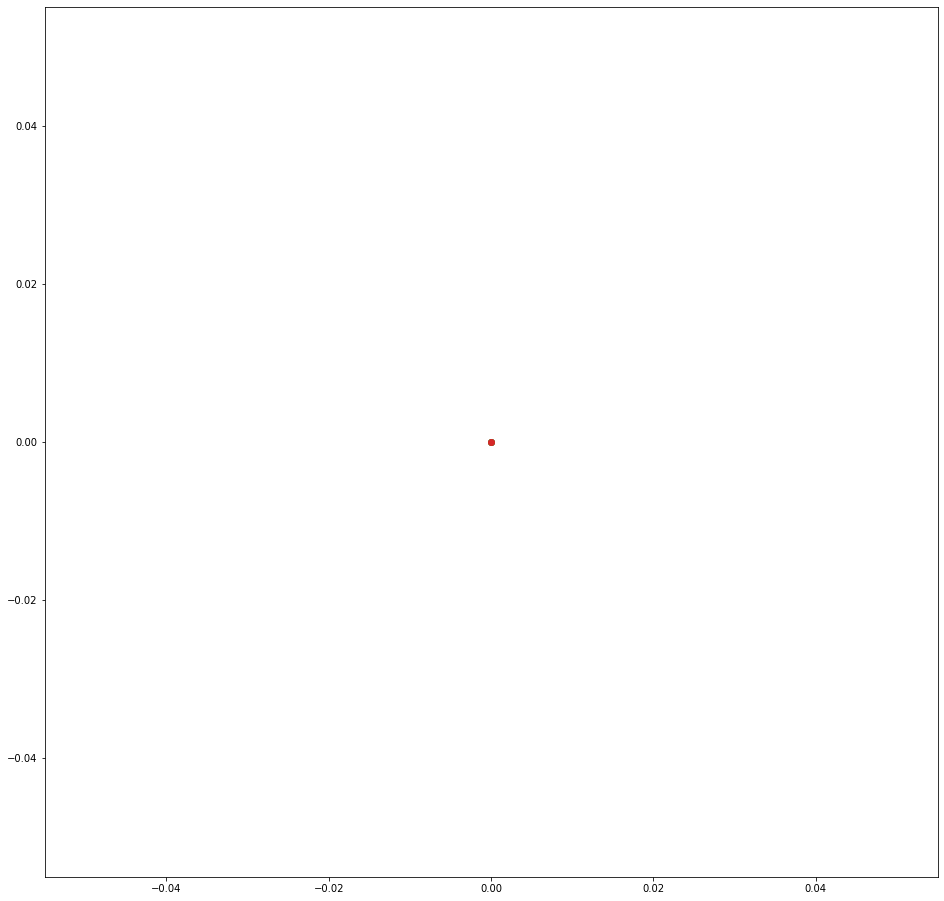

In [68]:
tsne_plot(samplevecs)

Assignment Questions:
1. What is the dimensionality of these word embeddings? Provide an integer answer.
  300
2. What are the top-5 most similar words to picnic (not including picnic itself)?
  picnics, picnic lunch, potluck, picnic supper, picnicking, cookout
3. According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus',
'manila', 'newsprint', 'parchment', 'gazette']
  tissue
4. Solve the following analogy: leg is to jump as X is to throw.
  forearm

In [15]:
vectors.dim

300

In [8]:
vectors.most_similar("picnic", topn = 7)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216),
 ('cookout', 0.63243484)]

In [17]:
 vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

In [13]:
vectors.most_similar(positive = ["throw", "leg"], negative = ["jump"])

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]